In [55]:
# Import des librairies essentielles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Lecture du dataset
df_ready = pd.read_csv("C:/Users/meria/Downloads/ML/MLproject/prepared_data.csv")
df_fe = pd.read_csv("C:/Users/meria/Downloads/ML/MLproject/processed_data.csv")

# Aperçu rapide
print("Dimensions :", df_ready.shape)
display(df_ready.head(5))


Dimensions : (30000, 665)


,Median_Salary_USD,Experience_Required_Years,Job_Openings_2024,Projected_Openings_2030,Remote_Work_Ratio_%,Automation_Risk_%,Gender_Diversity_%,Education_Num,AI_Impact_Num,Job_Status_Num,...,Job_Status_Increasing,AI_Impact_Level_Low,AI_Impact_Level_Moderate,Location_Brazil,Location_Canada,Location_China,Location_Germany,Location_India,Location_UK,Location_USA
0,-1.395182,-0.833491,-1.231978,0.442275,0.211404,-0.760726,-0.309688,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.225715,0.816517,-1.327050,0.394481,-1.140171,1.375642,0.949982,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.544813,-0.998491,-0.594779,-1.367596,1.449398,0.793470,-0.512300,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.216677,0.816517,0.745679,-0.353817,-1.655254,1.731413,0.913511,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.847490,0.486516,0.316103,0.809970,0.135453,-0.434863,1.307737,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
# Vérifier le DataFrame final
print(df_ready.shape)
df_ready.head()
import numpy as np

import numpy as np
X_prepared = np.load("C:/Users/meria/Downloads/ML/MLproject/X_prepared.npy")
print(X_prepared.shape)


(30000, 665)
(30000, 665)


In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
# PCA pour expliquer 95% de la variance
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(df_ready)

print("Nombre de composantes conservées :", X_pca.shape[1])


Nombre de composantes conservées : 299


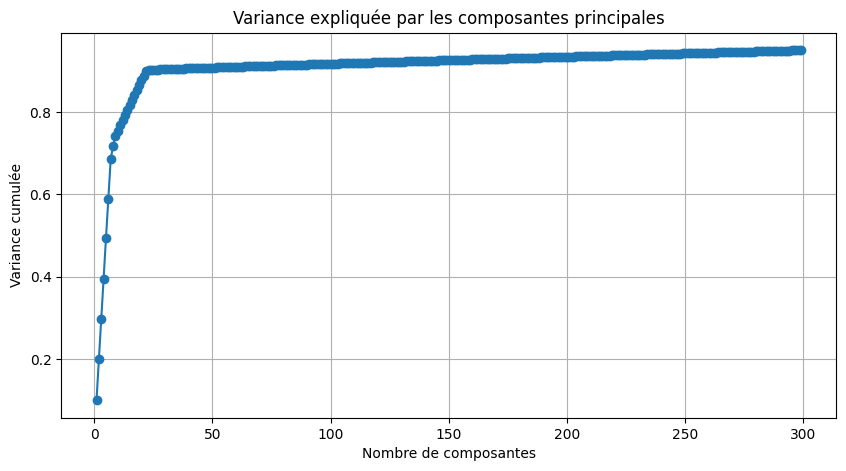

In [46]:
# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée')
plt.title('Variance expliquée par les composantes principales')
plt.grid(True)
plt.show()


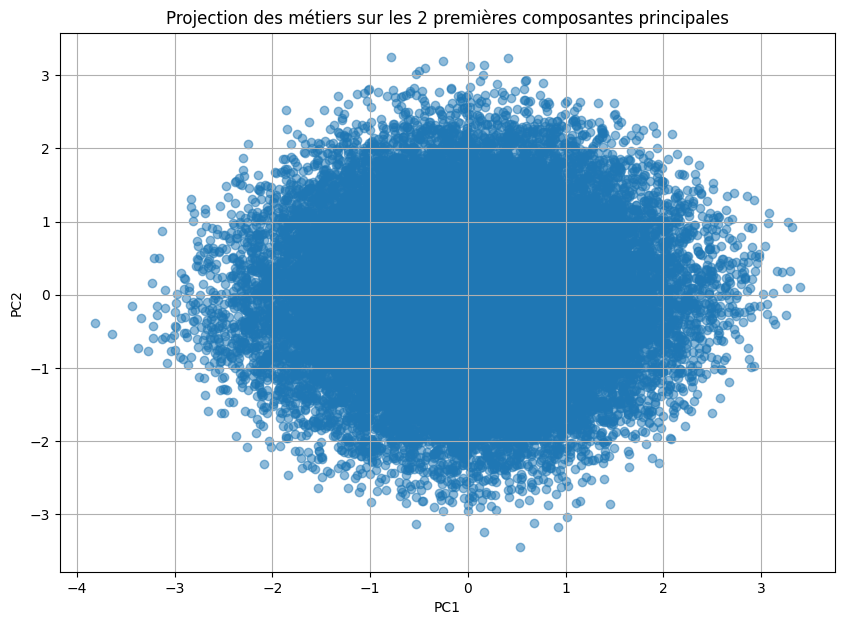

In [47]:
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des métiers sur les 2 premières composantes principales')
plt.grid(True)
plt.show()


In [48]:
# Contribution des features à la PC1 et PC2
pca_features = pd.DataFrame(pca.components_[:2], columns=df_ready.columns, index=['PC1','PC2']).T
pca_features.sort_values(by='PC1', ascending=False).head(10)  # top 10 features PC1


,PC1,PC2
Gender_Diversity_%,0.492227,-0.567178
Median_Salary_USD,0.471717,-0.193009
Automation_Risk_%,0.447510,0.396536
Projected_Openings_2030,0.411850,-0.097999
Remote_Work_Ratio_%,0.308757,0.253954
Experience_Required_Years,0.259839,0.622697
Job_Openings_2024,0.048097,-0.147627
Job_Status_Increasing,0.003951,0.005381
AI_Impact_Level_Moderate,0.003493,0.005342
Location_Brazil,0.003383,0.000940


C:\Users\meria\AppData\Local\Temp\ipykernel_9288\3769614903.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],
C:\Users\meria\AppData\Local\Temp\ipykernel_9288\3769614903.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


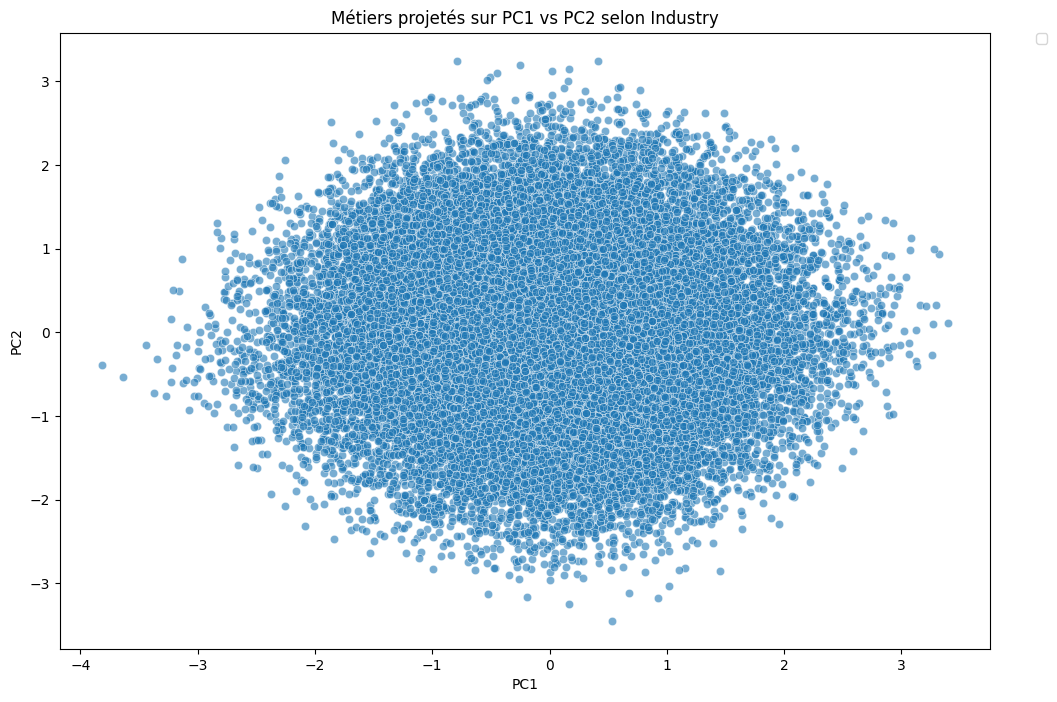

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pour colorer selon l'Industry
# Remarque : on utilise le DataFrame original df_ready pour garder les labels
plt.figure(figsize=(12,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], 
             alpha=0.6, palette='Set2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Métiers projetés sur PC1 vs PC2 selon Industry')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [50]:
#clustering 

In [51]:
#DBSCAN 

In [58]:
X_country =df_ready[['Job_Growth_Rate_%', 'Automation_Risk_%', 'Median_Salary_USD']]


KeyError: "['Job_Growth_Rate_%'] not in index"

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_country)


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=10)
df_ready['DBSCAN_Country_Cluster'] = dbscan.fit_predict(X_scaled)


In [ ]:
# Moyenne de Job_Growth_Rate par cluster et par pays
country_summary = df_ready.groupby(['Location', 'DBSCAN_Country_Cluster'])['Job_Growth_Rate_%'].mean()
print(country_summary.sort_values(ascending=False))


In [ ]:
heatmap_data = df_ready.pivot_table(
    index='Location',
    columns='DBSCAN_Country_Cluster',
    values='Job_Growth_Rate_%',
    aggfunc='mean'
)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Moyenne Job Growth Rate par Pays et Cluster DBSCAN')
plt.show()


In [ ]:
# Top 5 métiers par pays selon Job_Growth_Rate_%
top_jobs = df_ready.groupby(['Location','Job_Title'])['Job_Growth_Rate_%'].mean().reset_index()
top_jobs_sorted = top_jobs.sort_values(['Location','Job_Growth_Rate_%'], ascending=[True,False])
top5_jobs = top_jobs_sorted.groupby('Location').head(5)

plt.figure(figsize=(14,8))
sns.barplot(
    x='Job_Growth_Rate_%',
    y='Job_Title',
    hue='Location',
    data=top5_jobs,
    dodge=False
)
plt.title('Top 5 métiers par pays selon Job Growth Rate')
plt.xlabel('Job Growth Rate (%)')
plt.ylabel('Job Title')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


In [ ]:
# Moyennes par pays et cluster DBSCAN
country_cluster_summary = df_ready.groupby(['Location', 'DBSCAN_Country_Cluster'])[
    ['Job_Growth_Rate_%', 'Automation_Risk_%', 'Median_Salary_USD', 'Experience_Required_Years']
].mean().round(2)

print(country_cluster_summary)


In [ ]:
# Métiers à forte croissance par pays
high_growth = df_ready[df_ready['Job_Growth_Rate_%'] > df_ready['Job_Growth_Rate_%'].quantile(0.9)]
high_growth.groupby('Location')['Job_Title'].value_counts().head(10)

# Métiers à forte décroissance par pays
low_growth = df_ready[df_ready['Job_Growth_Rate_%'] < df_ready['Job_Growth_Rate_%'].quantile(0.1)]
low_growth.groupby('Location')['Job_Title'].value_counts().head(10)


In [ ]:
top_jobs_by_country = df_ready.groupby(['Location', 'DBSCAN_Country_Cluster'])['Job_Title'] \
                            .value_counts() \
                            .groupby(level=0, group_keys=False) \
                            .head(5)

print(top_jobs_by_country)


In [ ]:
country_cluster_summary = df_ready.groupby(['Location', 'DBSCAN_Country_Cluster'])[
    ['Job_Growth_Rate_%', 'Automation_Risk_%', 'Median_Salary_USD']
].mean().round(2)

print(country_cluster_summary)


In [ ]:
for country in df_ready['Location'].unique():
    print(f"=== {country} ===")
    for cluster in df_ready['DBSCAN_Country_Cluster'].unique():
        subset = df_ready[(df_ready['Location']==country) & (df_ready['DBSCAN_Country_Cluster']==cluster)]
        if len(subset) == 0:
            continue
        top_jobs = [str(job) for job in subset['Job_Title'].value_counts().head(5).index.tolist()]
        mean_growth = subset['Job_Growth_Rate_%'].mean().round(2)
        mean_salary = subset['Median_Salary_USD'].mean().round(2)
        mean_risk = subset['Automation_Risk_%'].mean().round(2)
        print(f"Cluster {cluster}:")
        print(f"  Croissance moyenne : {mean_growth}%")
        print(f"  Salaire moyen : {mean_salary} USD")
        print(f"  Risque d'automatisation : {mean_risk}%")
        print(f"  Métiers principaux : {', '.join(top_jobs)}")
        print(f"  Interprétation : ...\n")


In [ ]:
#K_MEANS 

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Essai de plusieurs k
inertia = []
K_range = range(2, 21)  # tester k de 2 à 20

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualisation de la courbe de coude
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.xlabel("Nombre de clusters k")
plt.ylabel("Inertia (SSE)")
plt.title("Courbe de Coude pour KMeans")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, 'ro-', markersize=8)
plt.xlabel("Nombre de clusters k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score pour différents k")
plt.grid(True)
plt.show()

best_k = K_range[sil_scores.index(max(sil_scores))]
print("Meilleur k selon Silhouette Score :", best_k)


In [ ]:

kmeans = KMeans(n_clusters=best_k, random_state=42)
df_ready['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_ready['KMeans_Cluster'], cmap='tab10', s=20)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"Visualisation KMeans avec k={best_k}")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
for country in df_ready['Location'].unique():
    print(f"=== {country} ===")
    for cluster in df_ready['KMeans_Cluster'].unique():
        subset = df_ready[(df_ready['Location'] == country) & (df_ready['KMeans_Cluster'] == cluster)]
        if len(subset) == 0:
            continue
        # Top 5 métiers du cluster
        top_jobs = [str(job) for job in subset['Job_Title'].value_counts().head(5).index.tolist()]
        # Moyennes des indicateurs
        mean_growth = subset['Job_Growth_Rate_%'].mean().round(2)
        mean_salary = subset['Median_Salary_USD'].mean().round(2)
        mean_risk = subset['Automation_Risk_%'].mean().round(2)
        
        # Affichage
        print(f"Cluster {cluster}:")
        print(f"  Croissance moyenne : {mean_growth}%")
        print(f"  Salaire moyen : {mean_salary} USD")
        print(f"  Risque d'automatisation : {mean_risk}%")
        print(f"  Métiers principaux : {', '.join(top_jobs)}")
        print(f"  Interprétation : ...\n")


In [ ]:
#comparaison 

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# ---- DBSCAN ----
scatter = axes[0].scatter(X_pca[:,0], X_pca[:,1], 
                          c=df_ready['DBSCAN_Country_Cluster'], cmap='tab10', s=20)
axes[0].set_title("DBSCAN Clusters")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
fig.colorbar(scatter, ax=axes[0], label='DBSCAN Cluster')

# ---- KMeans ----
scatter2 = axes[1].scatter(X_pca[:,0], X_pca[:,1], 
                           c=df_ready['KMeans_Cluster'], cmap='tab10', s=20)
axes[1].set_title("KMeans Clusters")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
fig.colorbar(scatter2, ax=axes[1], label='KMeans Cluster')

plt.show()


In [ ]:
import seaborn as sns

# Exemple pour DBSCAN
heatmap_db = df_ready.groupby(['Location','DBSCAN_Country_Cluster'])['Job_Growth_Rate_%'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_db, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Croissance moyenne par pays - DBSCAN")
plt.show()

# Exemple pour KMeans
heatmap_km = df_ready.groupby(['Location','KMeans_Cluster'])['Job_Growth_Rate_%'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_km, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Croissance moyenne par pays - KMeans")
plt.show()


In [ ]:
top_jobs_km = df_ready.groupby('KMeans_Cluster')['Job_Title'].apply(lambda x: x.value_counts().head(3).index.tolist())
top_jobs_db = df_ready.groupby('DBSCAN_Country_Cluster')['Job_Title'].apply(lambda x: x.value_counts().head(3).index.tolist())

print("Top métiers KMeans par cluster:\n", top_jobs_km)
print("Top métiers DBSCAN par cluster:\n", top_jobs_db)


In [ ]:
#un seul graphique combiné “DBSCAN vs KMeans” où tu vois pays, croissance et clusters ensemble

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# PCA 2D pour réduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ----------------- Figure 1 : Scatter PCA -----------------
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# DBSCAN
scatter1 = axes[0].scatter(X_pca[:,0], X_pca[:,1], 
                           c=df_ready['DBSCAN_Country_Cluster'], cmap='tab10', s=20)
axes[0].set_title("DBSCAN Clusters")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
fig.colorbar(scatter1, ax=axes[0], label='Cluster DBSCAN')

# KMeans
scatter2 = axes[1].scatter(X_pca[:,0], X_pca[:,1], 
                           c=df_ready['KMeans_Cluster'], cmap='tab10', s=20)
axes[1].set_title("KMeans Clusters")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
fig.colorbar(scatter2, ax=axes[1], label='Cluster KMeans')

plt.tight_layout()
plt.show()

# ----------------- Figure 2 : Heatmap croissance moyenne par pays -----------------
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# DBSCAN
heatmap_db = df_ready.groupby(['Location','DBSCAN_Country_Cluster'])['Job_Growth_Rate_%'].mean().unstack()
sns.heatmap(heatmap_db, annot=True, fmt=".1f", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Croissance moyenne par pays - DBSCAN")

# KMeans
heatmap_km = df_ready.groupby(['Location','KMeans_Cluster'])['Job_Growth_Rate_%'].mean().unstack()
sns.heatmap(heatmap_km, annot=True, fmt=".1f", cmap="YlOrRd", ax=axes[1])
axes[1].set_title("Croissance moyenne par pays - KMeans")

plt.tight_layout()
plt.show()

# ----------------- Figure 3 : Top métiers par cluster -----------------
print("=== Top métiers DBSCAN par cluster ===")
for cluster in df_ready['DBSCAN_Country_Cluster'].unique():
    top_jobs = df_ready[df_ready['DBSCAN_Country_Cluster']==cluster]['Job_Title'].value_counts().head(5)
    print(f"Cluster {cluster}: {top_jobs.index.tolist()}")

print("\n=== Top métiers KMeans par cluster ===")
for cluster in df_ready['KMeans_Cluster'].unique():
    top_jobs = df_ready[df_ready['KMeans_Cluster']==cluster]['Job_Title'].value_counts().head(5)
    print(f"Cluster {cluster}: {top_jobs.index.tolist()}")
